In [1]:
inputs = [1,2,3,2.5]

weights = [
    [0.2,0.8,-0.5,1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2,3,0.5]


# weights = [0.2,0.8,-0.5,1.0]

# biases = 2



In [2]:
import numpy as np

In [3]:
output = np.dot(weights, inputs) + biases
output

array([4.8  , 1.21 , 2.385])

In [4]:
inputs = [
    [1,2,3,2.5],
    [2,5,-1.0,2.0],
    [-1.5, 2.7, 3.3, -0.8]
]

In [5]:
output = np.dot(inputs, np.array(weights).T) + biases
output

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

In [6]:
biases2 = [-1,2,0.5]
weights2 = [
    [0.1,-0.14,0.5],
    [-0.5,0.12,-0.33],
    [-0.44,0.73,-0.13]
]

In [7]:
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases

layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

layer2_outputs

array([[ 0.5031 , -1.04185, -1.03875],
       [ 0.2434 , -2.7332 , -4.7633 ],
       [-0.99314,  1.41254,  0.64345]])

In [8]:
np.random.seed(0)

X = [
    [1,2,3,2.5],
    [2,5,-1.0,2.0],
    [-1.5, 2.7, 3.3, -0.8]
]

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
# General idea of weights is to have them bw -1 to 1 - lets start with -0.01 to 0.01

layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 2)

layer1.forward(X)
print(layer1.output)

[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]


In [9]:
layer2.forward(layer1.output)
print(layer2.output)

[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


In [10]:
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]

outputs = []

for i in inputs:
    outputs.append(max(0, i))

outputs

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [11]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [12]:
def create_data(points, classes):
    X = np.zeros((points * classes, 2))
    y = np.zeros(points * classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points * class_number, points * (class_number + 1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(class_number * 4, (class_number + 1)*4, points) + np.random.randn(points)  * 0.2
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = class_number
    return X, y

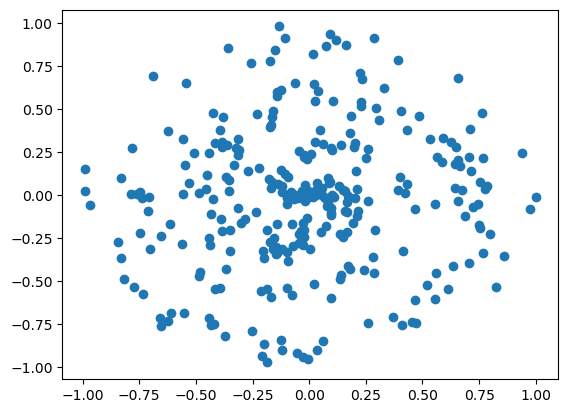

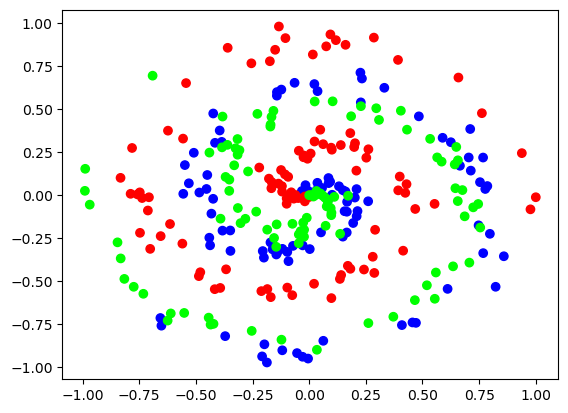

In [14]:
import matplotlib.pyplot as plt
X, y = create_data(100, 3)

plt.scatter(X[:,0], X[:,1])
plt.show()

plt.scatter(X[:,0], X[:,1], c = y, cmap='brg')
plt.show()

In [ ]:
layer1 = Layer_Dense(2, 5)
activation1 = Activation_ReLU()

layer1.forward(X)


In [16]:
layer1.output

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.87588650e-04, -7.60444379e-04,  1.57626540e-06,
         9.06900555e-04,  1.42693039e-03],
       [-9.33756178e-05, -1.67419009e-03,  9.47135389e-04,
         9.62997659e-04,  1.77594169e-03],
       ...,
       [ 7.54987797e-02, -5.56719341e-02, -1.46579115e-02,
         8.25756774e-02,  1.25843696e-01],
       [ 6.90425586e-02,  9.28127658e-03, -4.54857990e-02,
         3.87323371e-02,  4.83789970e-02],
       [ 7.41074638e-02, -2.48943157e-03, -4.21861663e-02,
         4.91825208e-02,  6.57264575e-02]], shape=(300, 5))

In [17]:
activation1.forward(layer1.output)

In [18]:
activation1.output

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.87588650e-04, 0.00000000e+00, 1.57626540e-06, 9.06900555e-04,
        1.42693039e-03],
       [0.00000000e+00, 0.00000000e+00, 9.47135389e-04, 9.62997659e-04,
        1.77594169e-03],
       ...,
       [7.54987797e-02, 0.00000000e+00, 0.00000000e+00, 8.25756774e-02,
        1.25843696e-01],
       [6.90425586e-02, 9.28127658e-03, 0.00000000e+00, 3.87323371e-02,
        4.83789970e-02],
       [7.41074638e-02, 0.00000000e+00, 0.00000000e+00, 4.91825208e-02,
        6.57264575e-02]], shape=(300, 5))